# **Wikipedia Project**

#### Alunos:


*   Lyndon Jonhson Cabral Filho
*   Rafael Pinheiro Carlos Maia

## Importando Bibliotecas

In [1]:
!pip install wikipedia

In [2]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

## Instanciando o Grafo

Para o projeto utilizamos um livro do Stephen King, Sob a Redoma (Under The Dome).

In [3]:
# https://en.wikipedia.org/wiki/Under_the_Dome_(novel)
SEED = "Under the Dome (Novel)".title()
STOPS = ("International Standard Name Identifier",
         "Viaf (Identifier)",
         "Isni (Identifier)",
         "Isbn (Identifier)",
         "Stephen King",
         "Under the dome")

In [4]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [5]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [6]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Under The Dome (Novel)
1 'Salem'S Lot
1 11/22/63
1 A Good Marriage (Film)
1 Aide-De-Camp
1 All-World
1 Allegory
1 Alternate Reality Game
1 Amazon.Com
1 American Vampire
1 Amy Chozick
1 Animal Farm
Could not load Animal Farm
1 Ant Farm
Could not load Ant Farm
1 Asphyxia
1 Associated Press
1 Bag Of Bones
1 Barnes & Noble
1 Bibliography Of Works On Stephen King
1 Billy Summers
1 Black House (Novel)
1 Black Ribbons
1 Blaze (Novel)
1 Blue On Blue (Under The Dome)
1 Book Tv
1 Brain Tumor
1 Brevet (Military)
1 Brian K. Vaughan
Could not load Brian K. Vaughan
1 Bridgton, Maine
1 C-Span
1 Cbs


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Cbs
1 Carrie (Novel)
1 Castle Rock (Stephen King)
1 Castle Rock Entertainment
1 Cat'S Eye (1985 Film)
1 Cell (Film)
1 Cell (Novel)
1 Charles Scribner'S Sons
1 Charlie The Choo-Choo (Book)
1 Chinga (The X-Files)
1 Christine (Novel)
1 Creepshow
1 Cujo
Could not load Cujo
1 Curtains (Under The Dome)
1 Cycle Of The Werewolf
1 Dan Simmons
Could not load Dan Simmons
1 Danse Macabre (Book)
1 Derry (Stephen King)
1 Desperation (Novel)
1 Diabolus Ex Machina
1 Dick Cheney
1 Different Seasons
1 Disembowel
1 Doctor Sleep (Novel)
1 Dollar Baby
1 Dolores Claiborne
1 Dome
1 Domed City
Could not load Domed City
1 Douglas E. Winter
1 Dreamworks Television
1 Dreamcatcher (Novel)
1 Duma Key
1 Dust Jacket
Could not load Dust Jacket
1 Elevation (Novella)
1 End Of Watch (Novel)
1 Endpaper
1 Entertainment Weekly
1 Everything'S Eventual
1 Exigent Circumstances (Under The Dome)
1 Extraterrestrial Life
1 Facsimile
1 Fairy Tale (Novel)
1 Faithful (Book)
1 Fallout Shelter
Could not load Fallout She

In [7]:
print("Número de Nós: {}".format(len(g)))
print("Número de Links: {}".format(nx.number_of_edges(g)))

Número de Nós: 39975
Número de Links: 71451


## Removendo Duplicatas

Etapa necessária para remover as duplicatas presentes no dataset.

In [8]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Hallucination', 'Hallucinations'), ('Primetime Emmy Award', 'Primetime Emmy Awards'), ('Secret Window', 'Secret Windows'), ('Aiguillette', 'Aiguillettes'), ('Governor', 'Governors'), ('Lieutenant', 'Lieutenants'), ('Nuclear Weapon', 'Nuclear Weapons'), ('Post-Nominal Letter', 'Post-Nominal Letters'), ('Audio-Animatronic', 'Audio-Animatronics'), ('Blue', 'Blues'), ('Characterization', 'Characterizations'), ('Fairy Tale', 'Fairy Tales'), ('America', 'Americas'), ('Blog', 'Blogs'), ('Cooperative', 'Cooperatives'), ('Exit Poll', 'Exit Polls'), ('Style Guide', 'Style Guides'), ('A&E Network', 'A&E Networks'), ('Audiobook', 'Audiobooks'), ('Ghost', 'Ghosts'), ('Cd', 'Cds'), ('Horror Film', 'Horror Films'), ('Boston Marathon Bombing', 'Boston Marathon Bombings'), ('Anticonvulsant', 'Anticonvulsants'), ('Astrocyte', 'Astrocytes'), ('Glioma', 'Gliomas'), ('Headache', 'Headaches'), ('Meningioma', 'Meningiomas'), ('Nerve Sheath Tumor', 'Nerve Sheath Tumors'), ('Neuron', 'Neurons'), ('Oligodend

In [9]:
print("Número de Nós: {}".format(len(g)))
print("Número de Links: {}".format(nx.number_of_edges(g)))

Número de Nós: 39827
Número de Links: 71338


## Truncamento da Rede

Nessa etapa nós removemos os nós de grau inferior a 4. Pois como visto nos grafos gerados abaixo, há uma grande quantidade de nós com essa quantidade de grau com relação aos outros graus.

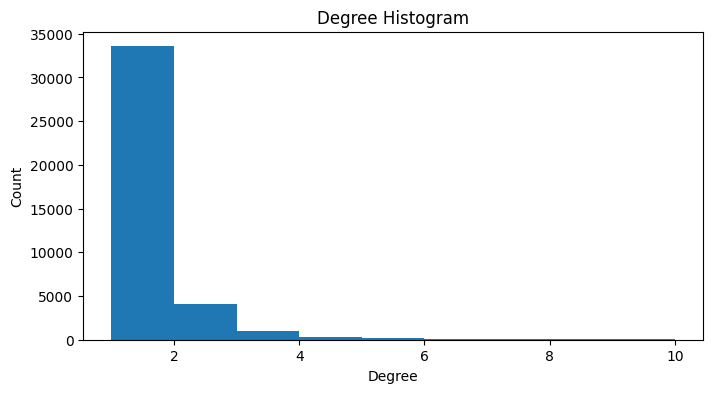

In [10]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree")

plt.show()

In [11]:
# filter nodes with degree greater than or equal to 4
core = [node for node, deg in dict(g.degree()).items() if deg >= 4]

# select a subgraph with 'core' nodes
g2 = nx.subgraph(g, core)

print("Número de Nós: {}".format(len(g2)))
print("Número de Links: {}".format(nx.number_of_edges(g2)))

nx.write_graphml(g2, "cna.graphml")

Número de Nós: 1193
Número de Links: 26623


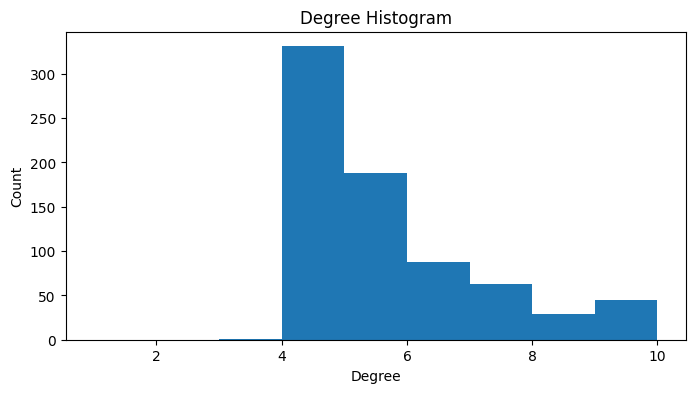

In [13]:
degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)

fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree")

plt.show()

## Medidas da Centralidade

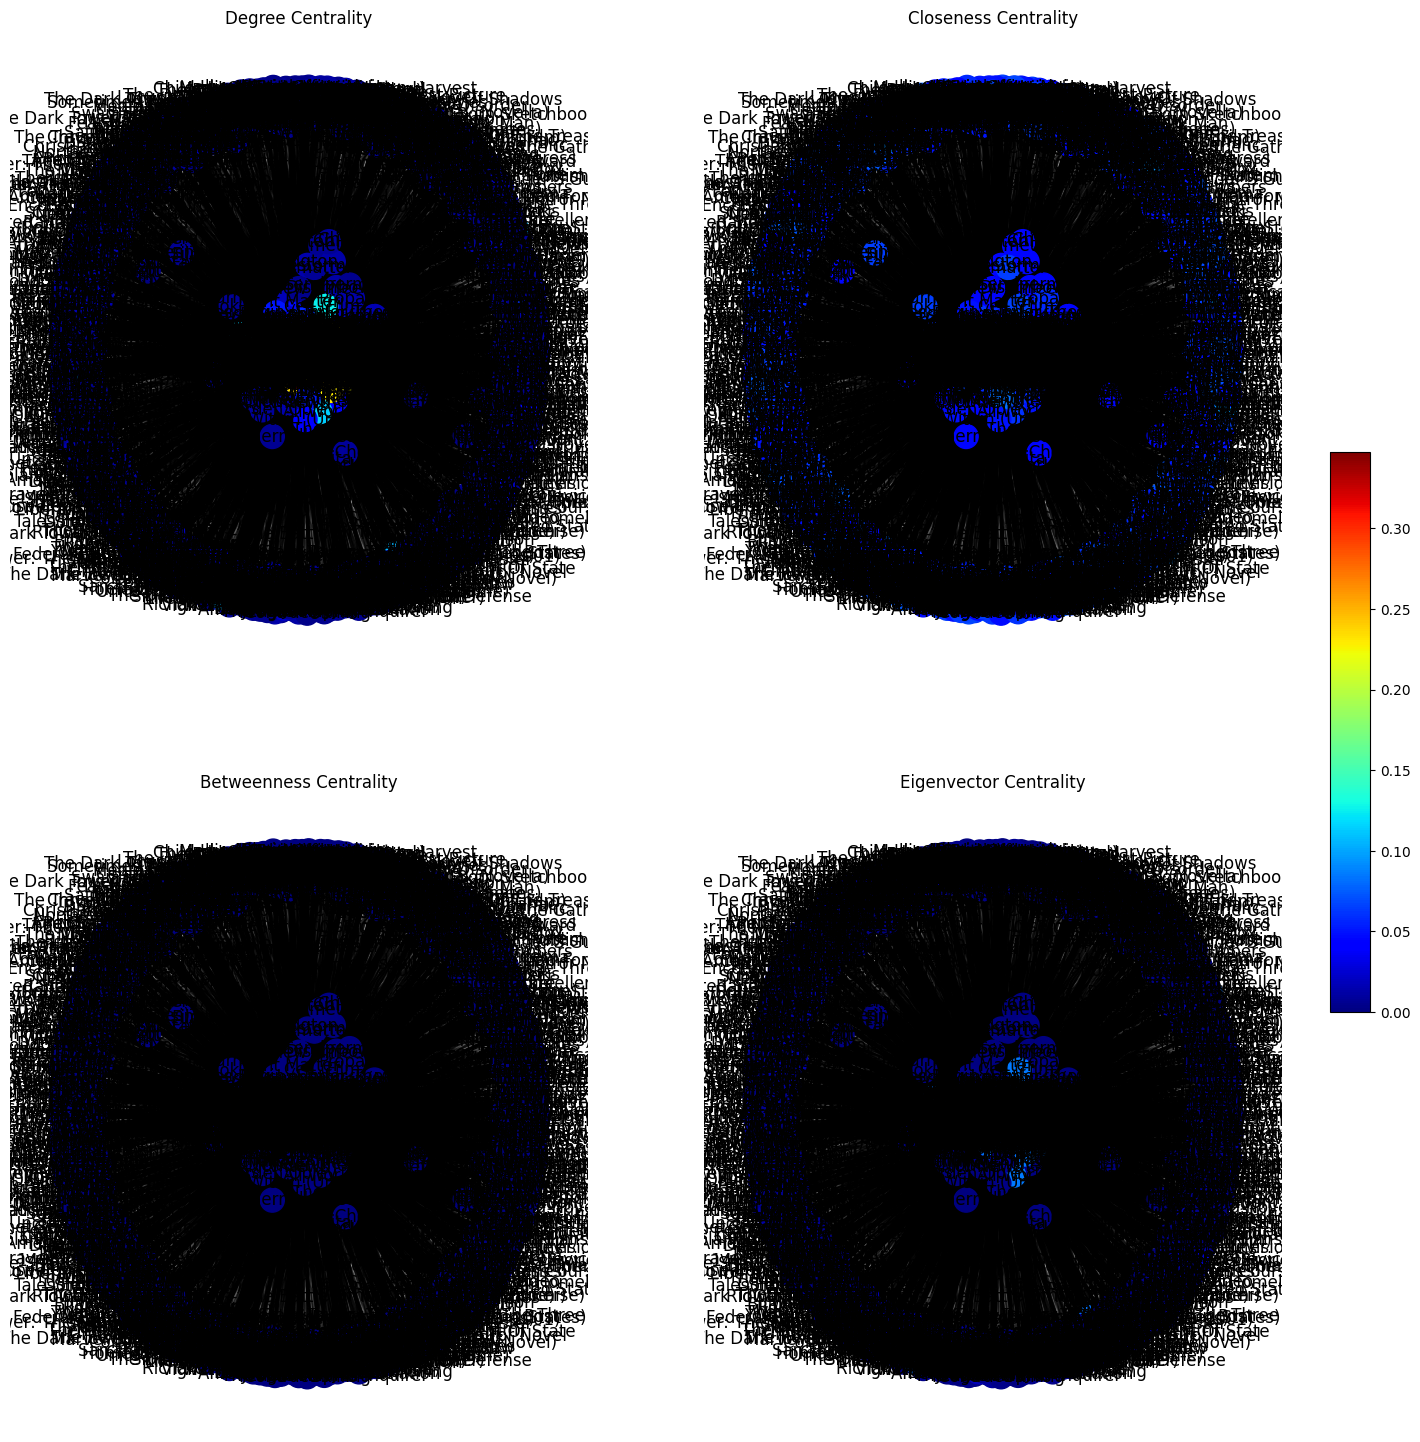

In [14]:
fig, ax = plt.subplots(2,2,figsize=(16,14))

# max value of metrics
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(g2).items()]),
                      max([v for k, v in nx.degree_centrality(g2).items()]),
                      max([v for k, v in nx.closeness_centrality(g2).items()]),
                      max([v for k, v in nx.betweenness_centrality(g2).items()])])

# layout position
pos = nx.spring_layout(g2,seed=123456789,k=0.3)

# color of nodes
color_degree = list(dict(nx.degree_centrality(g2)).values())
color_closeness = list(dict(nx.closeness_centrality(g2)).values())
color_betweenness = list(dict(nx.betweenness_centrality(g2)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(g2)).values())

#
# draw edges
#
# degree centrality
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

#
# draw labels
#
nx.draw_networkx_labels(g2, pos=pos,
                        font_color='black', ax=ax[0,0])
nx.draw_networkx_labels(g2, pos=pos,
                        font_color='black', ax=ax[0,1])
nx.draw_networkx_labels(g2, pos=pos,
                        font_color='black', ax=ax[1,0])
nx.draw_networkx_labels(g2, pos=pos,
                        font_color='black', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centrality")
ax[0,1].set_title("Closeness Centrality")
ax[1,0].set_title("Betweenness Centrality")
ax[1,1].set_title("Eigenvector Centrality")

plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [15]:
nx.degree_centrality(g2)

{'John Langan': 0.0041946308724832215,
 'Antihero': 0.003355704697986577,
 'Pet Sematary (2019 Film)': 0.016778523489932886,
 'Fiction': 0.003355704697986577,
 'Hearts In Atlantis (Film)': 0.015939597315436243,
 'Publishing': 0.0050335570469798654,
 'Fortune (Magazine)': 0.003355704697986577,
 'Broadcast Syndication': 0.003355704697986577,
 'The Monkey': 0.003355704697986577,
 'The Little Sisters Of Eluria': 0.022651006711409395,
 'Hallucination': 0.03523489932885906,
 'Vampire': 0.003355704697986577,
 'Salon (Website)': 0.003355704697986577,
 'Vhs': 0.003355704697986577,
 'Behavior': 0.003355704697986577,
 'Imdb': 0.010067114093959731,
 'Swan Song (Mccammon Novel)': 0.0041946308724832215,
 "Everything'S Eventual (Novella)": 0.02181208053691275,
 'Chairman': 0.003355704697986577,
 'Washington Post': 0.0041946308724832215,
 'Huffpost': 0.003355704697986577,
 'The Ringer (Website)': 0.009228187919463088,
 'American Library Association': 0.0041946308724832215,
 'Virtual Obsession': 0.0033

In [16]:
nx.closeness_centrality(g2)

{'John Langan': 0.04752783489157,
 'Antihero': 0.051427732873439026,
 'Pet Sematary (2019 Film)': 0.05382857896066521,
 'Fiction': 0.05220517737296261,
 'Hearts In Atlantis (Film)': 0.053740623766285044,
 'Publishing': 0.06566936786666491,
 'Fortune (Magazine)': 0.057801865984123804,
 'Broadcast Syndication': 0.059153348462169866,
 'The Monkey': 0.044384968616688864,
 'The Little Sisters Of Eluria': 0.04580677123254379,
 'Hallucination': 0.06793929537063724,
 'Vampire': 0.04459371199495518,
 'Salon (Website)': 0.05436241610738255,
 'Vhs': 0.047390867067674994,
 'Behavior': 0.04968293704522652,
 'Imdb': 0.07744129472317392,
 'Swan Song (Mccammon Novel)': 0.04752783489157,
 "Everything'S Eventual (Novella)": 0.04574306223222037,
 'Chairman': 0.051712675699632775,
 'Washington Post': 0.06013807702484906,
 'Huffpost': 0.06090604026845638,
 'The Ringer (Website)': 0.045727367845562174,
 'American Library Association': 0.06436254744611829,
 'Virtual Obsession': 0.047390867067674994,
 'Dolore

In [17]:
nx.betweenness_centrality(g2)

{'John Langan': 0.0,
 'Antihero': 0.0,
 'Pet Sematary (2019 Film)': 0.0,
 'Fiction': 0.0,
 'Hearts In Atlantis (Film)': 0.0,
 'Publishing': 0.0,
 'Fortune (Magazine)': 0.0,
 'Broadcast Syndication': 0.0,
 'The Monkey': 0.0,
 'The Little Sisters Of Eluria': 0.0,
 'Hallucination': 0.0010811919438327247,
 'Vampire': 0.0,
 'Salon (Website)': 0.0,
 'Vhs': 0.0,
 'Behavior': 0.0,
 'Imdb': 0.0,
 'Swan Song (Mccammon Novel)': 0.0,
 "Everything'S Eventual (Novella)": 0.0,
 'Chairman': 0.0,
 'Washington Post': 0.0,
 'Huffpost': 0.0,
 'The Ringer (Website)': 1.5246320520377678e-05,
 'American Library Association': 0.0,
 'Virtual Obsession': 0.0,
 'Dolores Claiborne': 0.0007181863380771635,
 'Pen Name': 0.0,
 'Fox News': 0.0,
 'Autopsy Room Four': 0.0,
 'Needful Things': 0.000325338062805557,
 'Alabama': 0.0,
 'Cheddar (Tv Channel)': 0.0,
 "Charles Scribner'S Sons": 0.0007734951295134263,
 'Soviet Union': 0.0,
 'Nitrogen': 0.0,
 'Different Seasons': 0.0008458609553410712,
 'Paramount Pictures': 0.0

In [18]:
nx.eigenvector_centrality(g2)

{'John Langan': 0.0034031415946074225,
 'Antihero': 0.00017068472815696422,
 'Pet Sematary (2019 Film)': 0.013194783509778965,
 'Fiction': 0.00017088854100802238,
 'Hearts In Atlantis (Film)': 0.012505582101674744,
 'Publishing': 0.0009176174581951283,
 'Fortune (Magazine)': 4.966538001439152e-05,
 'Broadcast Syndication': 0.00016662449771838542,
 'The Monkey': 0.0021924574581812235,
 'The Little Sisters Of Eluria': 0.017898229632472333,
 'Hallucination': 0.002074745589300467,
 'Vampire': 0.0027249666086433225,
 'Salon (Website)': 3.86960327406219e-05,
 'Vhs': 0.002744710968188025,
 'Behavior': 3.468579520776743e-05,
 'Imdb': 0.00190192027701656,
 'Swan Song (Mccammon Novel)': 0.0034031415946074225,
 "Everything'S Eventual (Novella)": 0.017221122888619742,
 'Chairman': 2.9183580954152154e-05,
 'Washington Post': 0.00011278032055630862,
 'Huffpost': 0.00013511634998631365,
 'The Ringer (Website)': 0.0006859009360825725,
 'American Library Association': 0.0027308988751871552,
 'Virtual O

## Distribuição de Centralidade

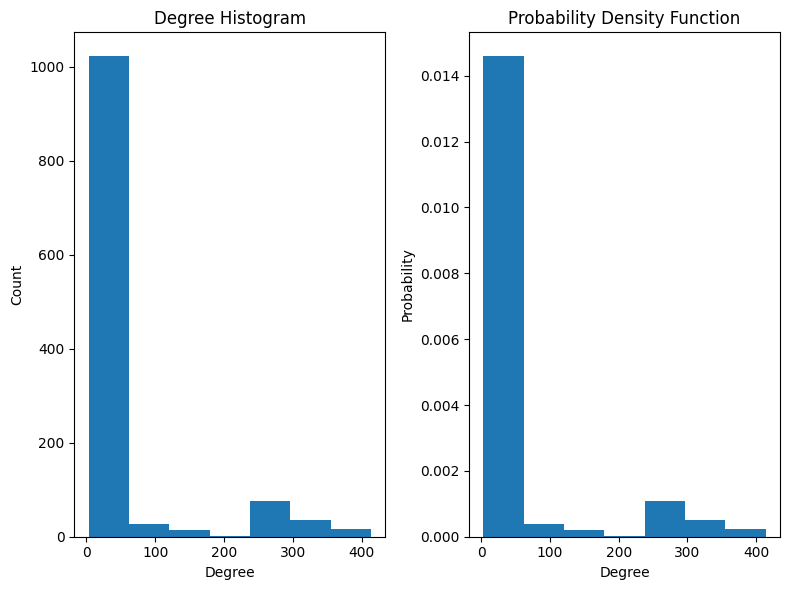

In [19]:
degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

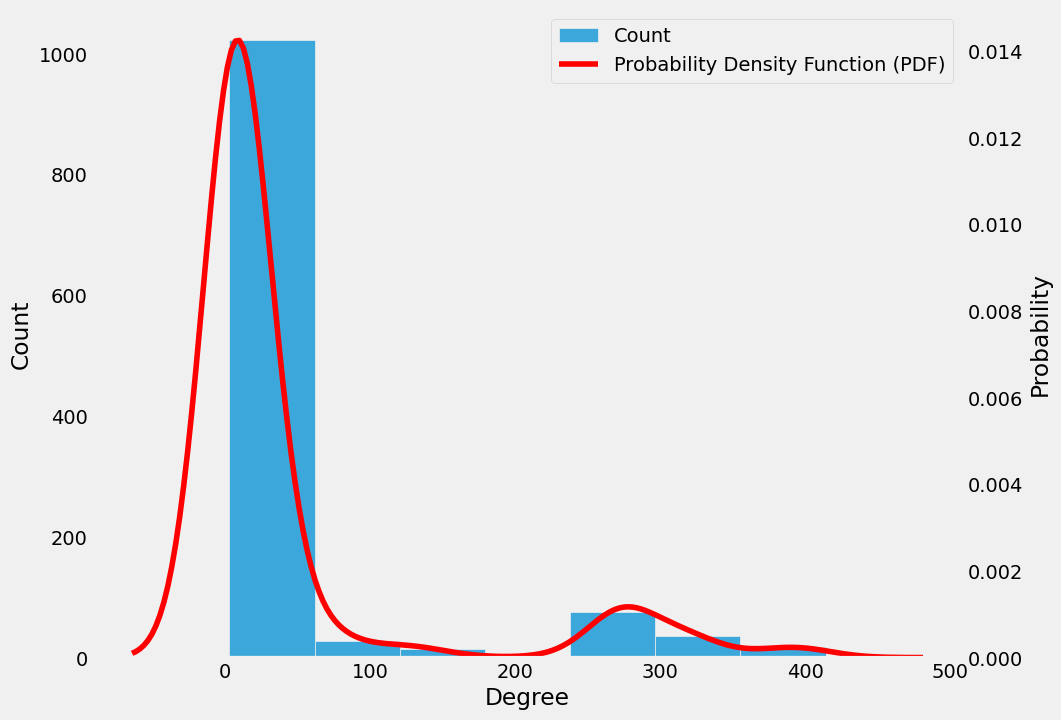

In [20]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

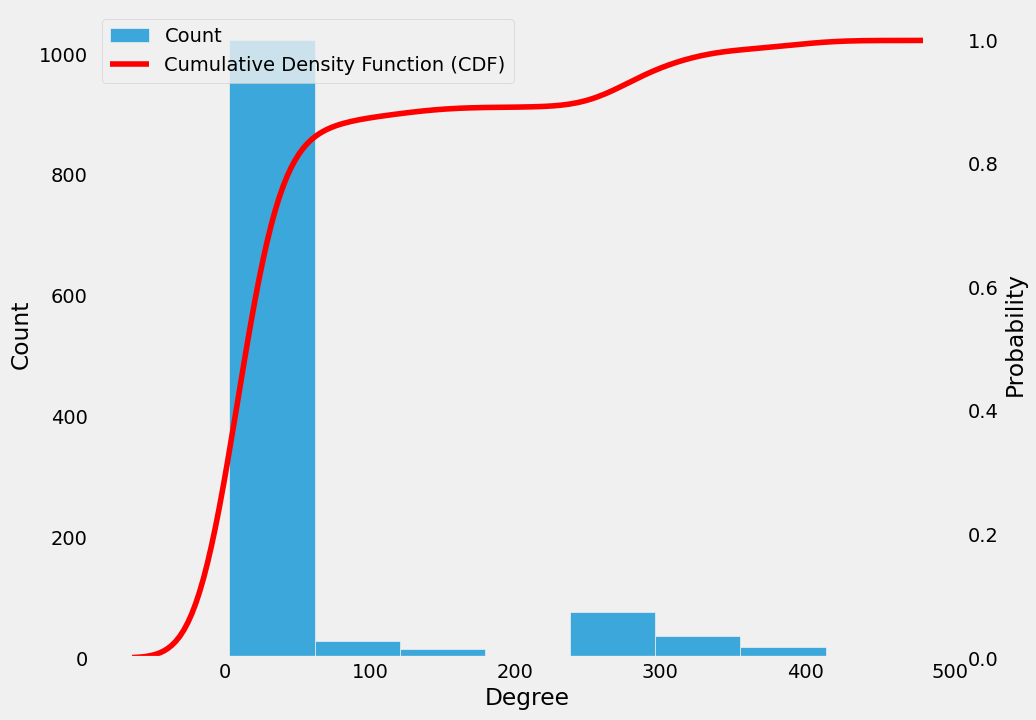

In [21]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

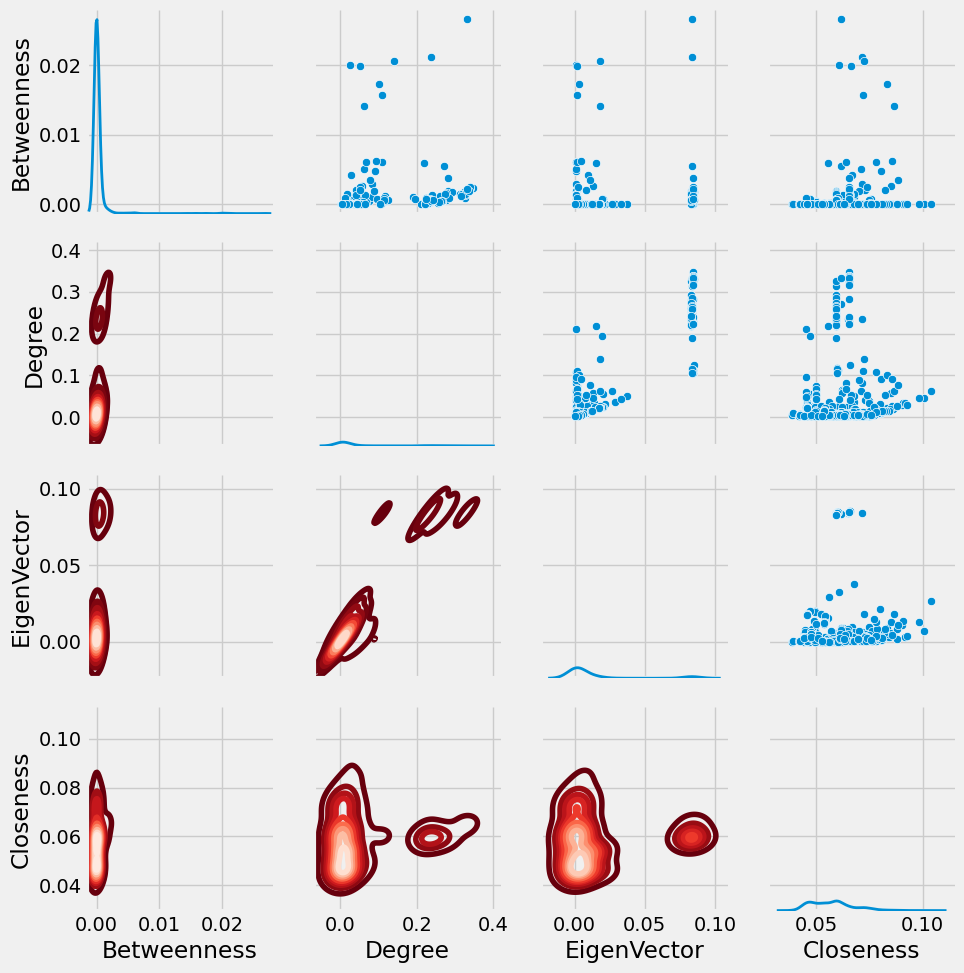

In [22]:
bc = pd.Series(nx.betweenness_centrality(g2))
dc = pd.Series(nx.degree_centrality(g2))
ec = pd.Series(nx.eigenvector_centrality(g2))
cc = pd.Series(nx.closeness_centrality(g2))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()


## Decomposição de Núcleo

In [23]:
set([v for k,v in nx.core_number(g2).items()])

{3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 34,
 39,
 40,
 41,
 44,
 45,
 49,
 55,
 125,
 126,
 127,
 143,
 153,
 243}

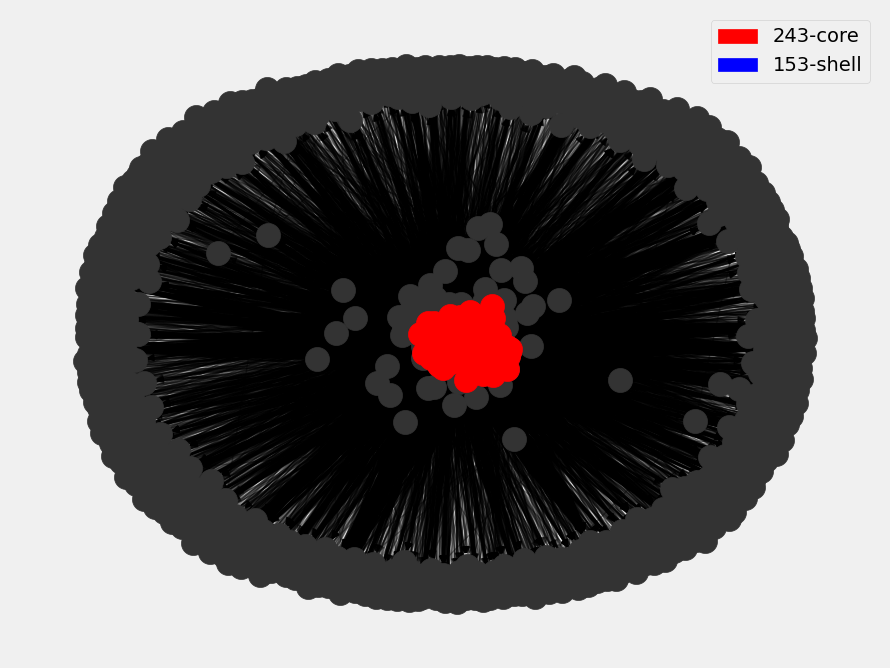

In [24]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
gplot_shell = nx.k_shell(g2, 153)
gplot_core = nx.k_core(g2, 243)

# layout position
pos = nx.spring_layout(g2,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(gplot_shell,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(gplot_core,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='243-core')
blue_patch = mpatches.Patch(color='blue', label='153-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()